# Project: Visualizing Real World Data

##### Objetivo:

Estudiar la distribución de la riqueza en el top de los 2600 billonarios a nivel mundial, extraído de la revista Forbes.

##### A responder: 
            ¿Cómo es la distribución económica global considerando el top de los 2600 billonarios? 

##### A observar: 
            Se desea visualizar la forma en que se distribuyen los ingresos en el top de los billonarios a nivel mundial,    las industrias más exitosas, países con más población de billonarios, entre otros aspectos relacionados.

###### Importar librerías

In [1]:
import numpy as np
import pandas as pd
import pandas.util

In [102]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [103]:
#import matplotlib for plotting graph
from matplotlib import pyplot as plt
plt.style.use('ggplot')


In [149]:
import seaborn as sns

In [193]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster

from folium import plugins
import geocoder
import ipywidgets

#from folium.plugins import MarkerCluster

In [373]:
import geocoder
import branca
import statistics as stats

###### Cargar datos

In [55]:
forbes_realtime = pd.read_csv('data.csv')
forbes_realtime

,Ranking,Name,NetWorth,Age,Country,Source,Industry
0,1.0,Jeff Bezos,$177 B,57.0,United States,Amazon,Technology
1,2.0,Elon Musk,$151 B,49.0,United States,"Tesla, SpaceX",Automotive
2,3.0,Bernard Arnault & family,$150 B,72.0,France,LVMH,Fashion & Retail
3,4.0,Bill Gates,$124 B,65.0,United States,Microsoft,Technology
4,5.0,Mark Zuckerberg,$97 B,36.0,United States,Facebook,Technology
...,...,...,...,...,...,...,...
2595,2524.0,Low Tuck Kwong,$1.1 B,72.0,Indonesia,coal,Energy
2596,2524.0,Lu Weiding,$1.1 B,50.0,China,diversified,Diversified
2597,2524.0,Lv Yongxiang,$1.1 B,71.0,China,magnetic switches,Manufacturing
2598,2524.0,"Cargill MacMillan, III.",$1.1 B,61.0,United States,Cargill,Food & Beverage


###### Limpiar y tratar datos

In [57]:
#Limpiando de valores nulos
forbes_realtime['Age'] = forbes_realtime['Age'].fillna(forbes_realtime['Age'].median())
forbes_realtime['NetWorth'] = forbes_realtime['NetWorth'].fillna(0)

In [94]:
# Cambiando datos de float a integer:
forbes_realtime['Age'] = list(map(lambda x: int(x), forbes_realtime['Age']))
forbes_realtime['Ranking'] = list(map(lambda x: int(x), forbes_realtime['Ranking']))

#Limpiando los datos de la columna NetWorth:
forbes_realtime['NetWorth'] = list(map(lambda x: x.replace('$',' '), forbes_realtime['NetWorth']))
forbes_realtime['NetWorth'] = list(map(lambda x: x.replace('B',' '), forbes_realtime['NetWorth']))


In [99]:
#Cambiando datos de string a float
forbes_realtime['NetWorth'] = list(map(lambda x: float(x), forbes_realtime['NetWorth']))

In [100]:
forbes_realtime #La columna NetWorth está en Billones de $

,Ranking,Name,NetWorth,Age,Country,Source,Industry
0,1,Jeff Bezos,177.0,57,United States,Amazon,Technology
1,2,Elon Musk,151.0,49,United States,"Tesla, SpaceX",Automotive
2,3,Bernard Arnault & family,150.0,72,France,LVMH,Fashion & Retail
3,4,Bill Gates,124.0,65,United States,Microsoft,Technology
4,5,Mark Zuckerberg,97.0,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
2595,2524,Low Tuck Kwong,1.1,72,Indonesia,coal,Energy
2596,2524,Lu Weiding,1.1,50,China,diversified,Diversified
2597,2524,Lv Yongxiang,1.1,71,China,magnetic switches,Manufacturing
2598,2524,"Cargill MacMillan, III.",1.1,61,United States,Cargill,Food & Beverage


In [101]:
#Verificando que no existan valores nulos en las columnas del dataframe
np.sum(forbes_realtime.isnull())

Ranking     0
Name        0
NetWorth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64

## Gráficas

#### 1. Cantidad de Billonarios por país

In [345]:
#Agrupando por Country. Muestra cuántos billonarios de cada país de la lista hay.
Billonaries_by_country = forbes_realtime.groupby('Country')[['Name']].count()
Billonaries_by_country_CANTIDAD=len(Billonaries_by_country)
display(Billonaries_by_country)
print('Cantidad de billonarios por país: ',Billonaries_by_country_CANTIDAD)

,Name
Country,
Algeria,1
Argentina,5
Australia,41
Austria,12
Belgium,2
...,...
United Kingdom,54
United States,692
Venezuela,1


Cantidad de billonarios por país:  70


In [469]:
Billonaries_by_country.sort_values(by= 'Name', ascending = False)

,Name
Country,
United States,692
China,580
Germany,134
India,131
Russia,108
...,...
Liechtenstein,1
Iceland,1
Guernsey,1


In [369]:
def billon_pais(Billonaries_by_country,X):
    if X<70:
        a='Cantidad de billonarios por país. Top '+str(X)
    else:
        a='Cantidad de billonarios por país (Todos los países de la lista: 70) '
    Billonaries_by_country.sort_values(by= 'Name', ascending = False).head(X).plot(kind= 'bar', figsize = (18,9),color = 'r')
    plt.xlabel('Ciudad',fontsize = 20)
    plt.ylabel('Cantidad de billonarios',fontsize = 20)
    plt.title(a, fontsize = 22)

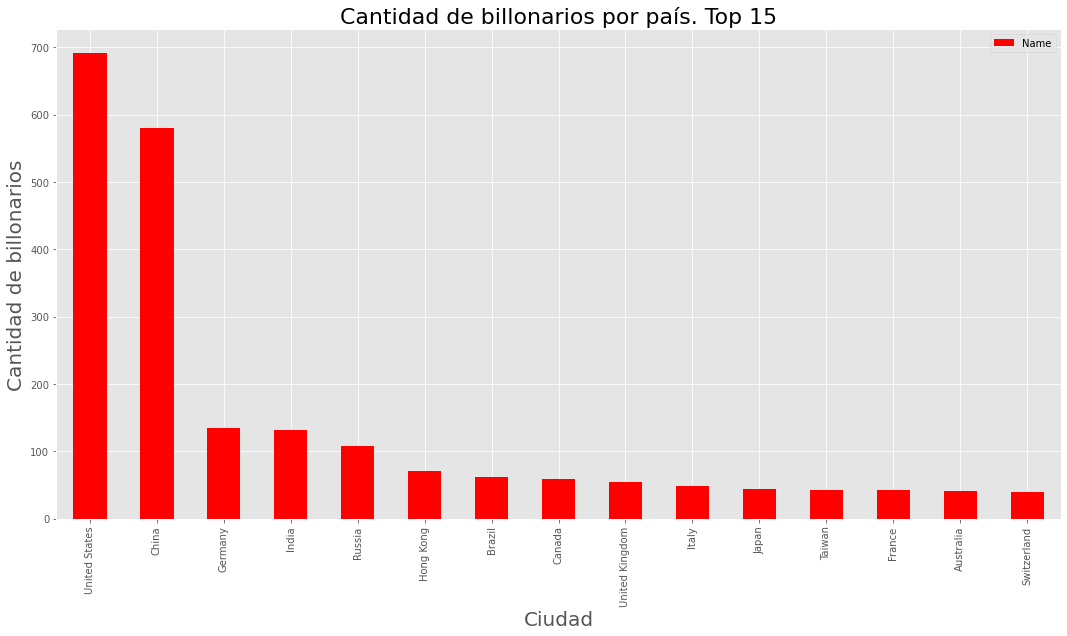

In [383]:
billon_pais(Billonaries_by_country,15)

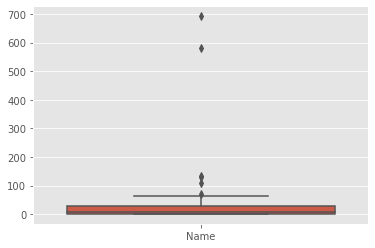

In [396]:
ax=sns.boxplot(data=Billonaries_by_country)

#### 2. Áreas industriales más exitosas

###### 2.1 ¿Cuántos billonarios de la lista hay por cada industria?

In [338]:
#Agrupando por Industry
Billonaries_by_industry = forbes_realtime.groupby('Industry')[['Name']].count()
Billonaries_by_industry_CANTIDAD=len(Billonaries_by_industry)
display(Billonaries_by_industry)
print('Cantidad de industrias: ',Billonaries_by_industry_CANTIDAD)

,Name
Industry,
Automotive,67
Construction & Engineering,38
Diversified,176
Energy,95
Fashion & Retail,261
Finance & Investments,357
Food & Beverage,202
Gambling & Casinos,24
Healthcare,211


Cantidad de industrias:  18


In [431]:
Billonaries_by_industry.sort_values(by= 'Name', ascending = False)

,Name
Industry,
Finance & Investments,357
Technology,338
Manufacturing,310
Fashion & Retail,261
Healthcare,211
Real Estate,205
Food & Beverage,202
Diversified,176
Energy,95


In [438]:
def billon_industria(Billonaries_by_industry,X): 
    if X<18:
        a='Cantidad de billonarios por industria. Top '+str(X)
    else:
        a='Cantidad de billonarios por industria. Todas las industrias'
        
    Billonaries_by_industry.sort_values(by= 'Name', ascending = False).head(X).plot(kind= 'bar', figsize = (18,9),color = 'r')
    plt.xlabel('Industria',fontsize = 20)
    plt.ylabel('Cantidad de billonarios',fontsize = 20)
    plt.title(a, fontsize = 22)

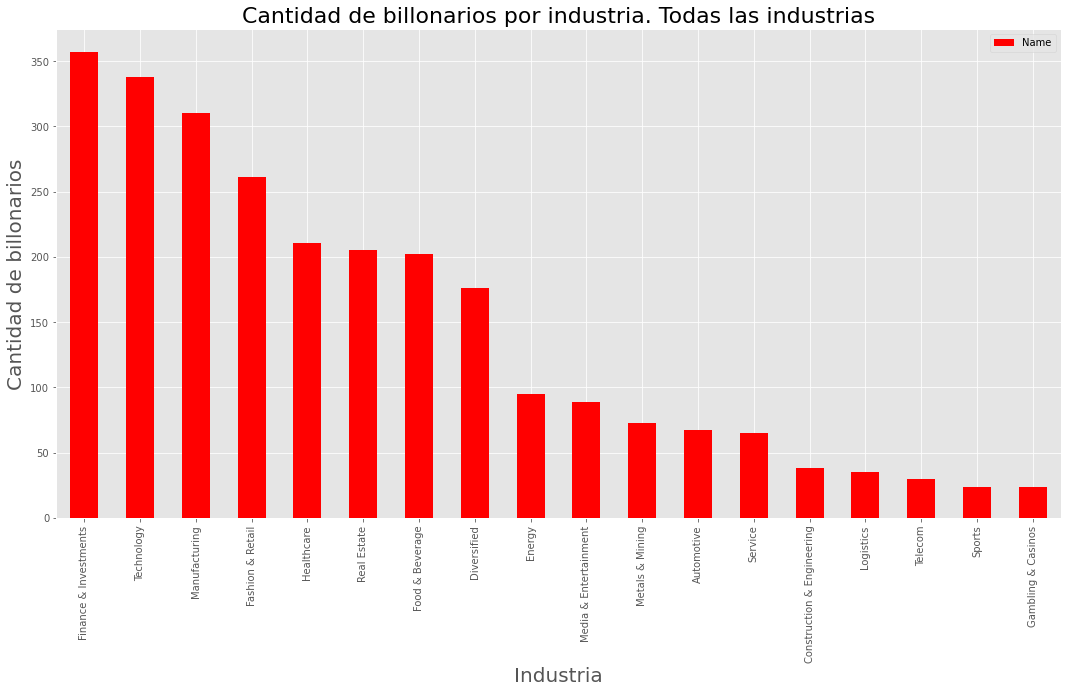

In [441]:
billon_industria(Billonaries_by_industry,18)

###### 2.2 ¿Cuántos billones de dólares devenga cada industria?

In [435]:
NetWorth_by_industry = forbes_realtime.groupby('Industry')[['NetWorth']].sum()
NetWorth_by_industry

,NetWorth
Industry,
Automotive,466.5
Construction & Engineering,118.9
Diversified,855.4
Energy,447.3
Fashion & Retail,1685.2
Finance & Investments,1513.6
Food & Beverage,1012.1
Gambling & Casinos,133.0
Healthcare,780.0


In [436]:
ordenados_NetWorth_by_industry=NetWorth_by_industry.sort_values(by= 'NetWorth', ascending = False)
ordenados_NetWorth_by_industry

,NetWorth
Industry,
Technology,2428.5
Fashion & Retail,1685.2
Finance & Investments,1513.6
Manufacturing,1098.0
Food & Beverage,1012.1
Diversified,855.4
Real Estate,805.1
Healthcare,780.0
Media & Entertainment,474.9


Text(0.5, 1.0, 'Billones de dólares por industria')

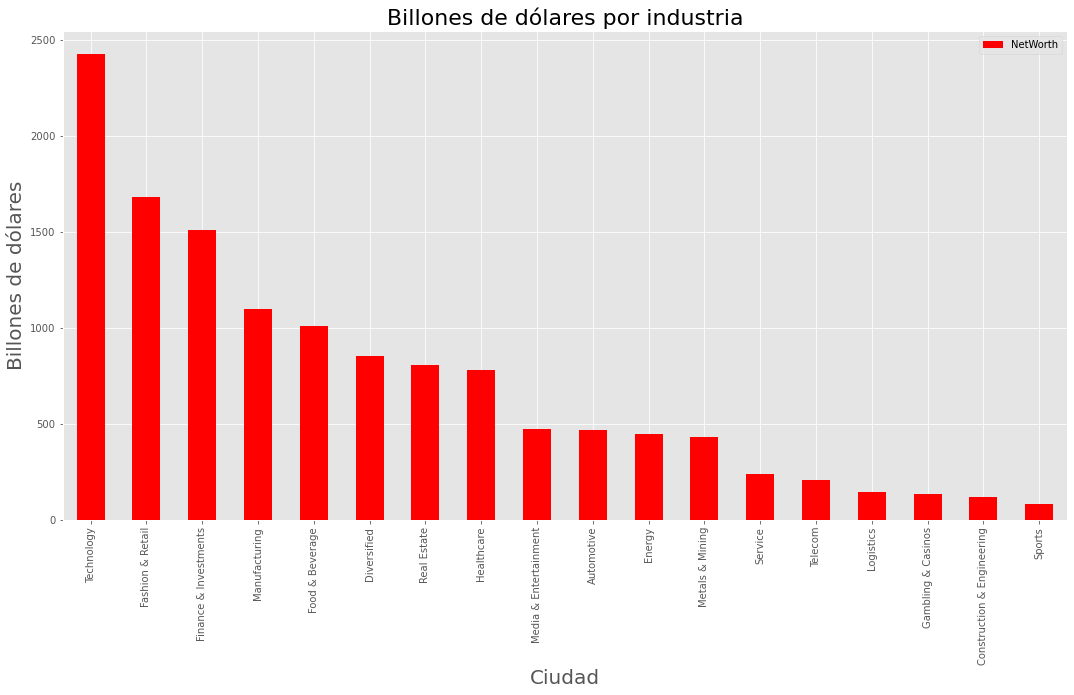

In [440]:
ordenados_NetWorth_by_industry.head(18).plot(kind= 'bar', figsize = (18,9),color = 'r')
plt.xlabel('Ciudad',fontsize = 20)
plt.ylabel('Billones de dólares',fontsize = 20)
plt.title('Billones de dólares por industria', fontsize = 22)

#### 3. Empresas con más accionistas presentes en la lista de los primeros 2600 billonarios del mundo

In [368]:
popular_source = forbes_realtime.groupby('Source')['Source'].count()
display(popular_source)
print('Cantidad de empresas en la lista:',len(popular_source))

Source
3D printing                 1
AOL                         1
Airbnb                      3
Airline                     1
Aldi, Trader Joe's          1
                           ..
wind turbines               1
wine                        2
winter jackets              1
wire & cables, paints       1
wireless networking gear    1
Name: Source, Length: 891, dtype: int64

Cantidad de empresas en la lista: 891


In [364]:
#Función para generar gráfico de barras que muestre el top de las X industrias más exitosas a nivel mundial.
def source(popular_source,X):
    popular_source.sort_values(ascending = False).head(X).plot.bar(figsize = (18,9), width = .9)
    plt.xlabel('Empresa',fontsize=20)
    plt.ylabel('Accionistas',fontsize=20)
    a='Cantidad de accionistas de las empresas más exitosas en la lista de los 2600 billonarios. Top '+str(X)
    plt.title(a, fontsize=20)

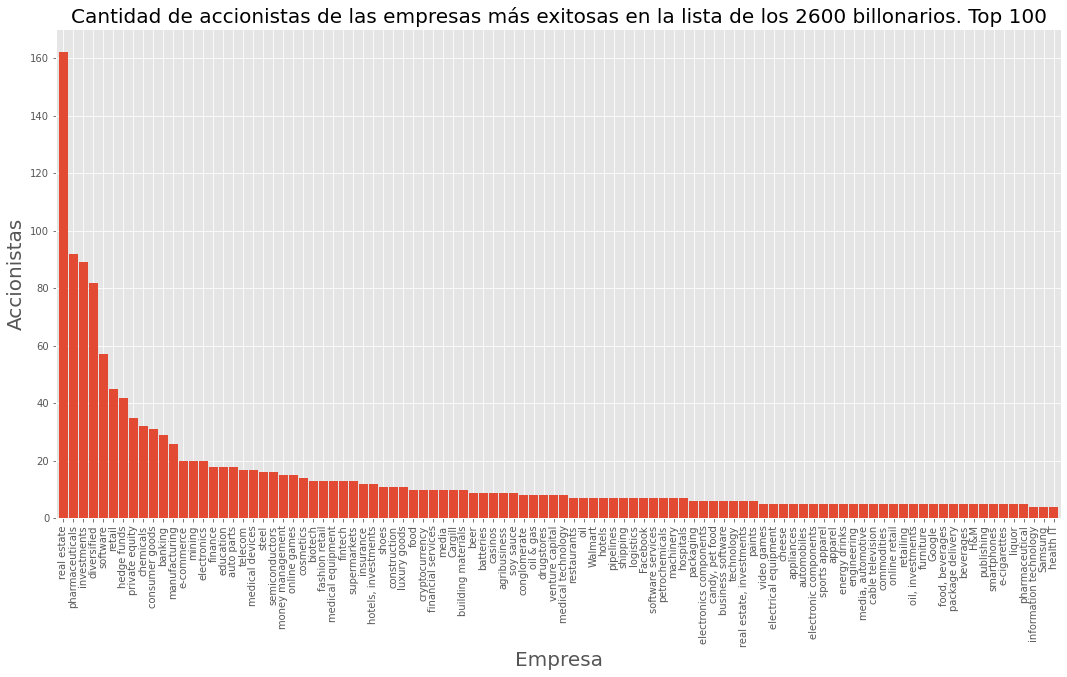

In [367]:
source(popular_source,100)

#### 4. Histograma de los billonarios por edad

In [448]:
forbes_realtime['Age']

0       57
1       49
2       72
3       65
4       36
        ..
2595    72
2596    50
2597    71
2598    61
2599    71
Name: Age, Length: 2600, dtype: int64

Text(0.5, 1.0, 'Histograma por edad')

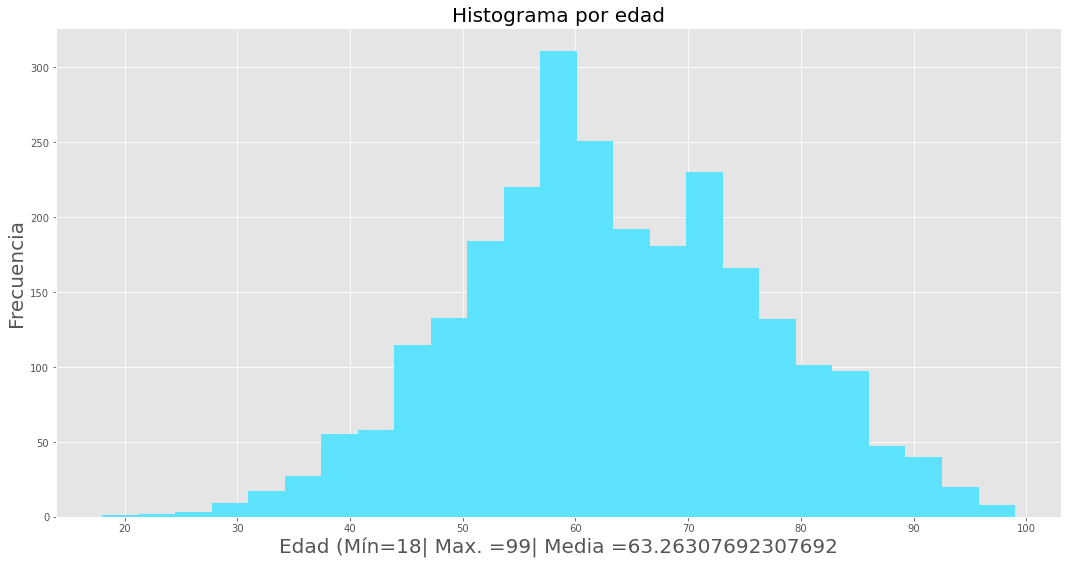

In [378]:
#seleccionar columna Age para el histograma
forbes_realtime['Age'].plot(kind = 'hist', bins =25, color ="#5ee3ff",stacked = True, figsize = (18,9) )
edad_min=min(forbes_realtime['Age'])
edad_max=max(forbes_realtime['Age'])
edad_mean=stats.mean(forbes_realtime['Age'])
cadena='Edad (Mín='+str(edad_min)+'| Max. ='+str(edad_max)+'| Media ='+str(edad_mean)
plt.xlabel(cadena,fontsize=20)
plt.ylabel('Frecuencia',fontsize=20)
plt.title('Histograma por edad', fontsize=20)

#### 5.Cantidad de billones de dólares por país, agrupando a los billonarios de la lista top 2600

In [450]:
Temp= forbes_realtime.groupby('Country')[['NetWorth']].sum().reset_index()
Temp

,Country,NetWorth
0,Algeria,4.8
1,Argentina,15.3
2,Australia,178.4
3,Austria,62.7
4,Belgium,11.5
...,...,...
65,United Kingdom,211.9
66,United States,4365.0
67,Venezuela,3.2
68,Vietnam,16.7


In [467]:
Temp['Country'][55]

'Spain'

In [468]:
Temp['NetWorth'][55]

133.99999999999994

In [451]:
Temp.sort_values(by= 'NetWorth', ascending = False)

,Country,NetWorth
66,United States,4365.0
8,China,2483.1
18,Germany,623.4
24,India,587.1
50,Russia,575.8
...,...,...
23,Iceland,2.2
56,St. Kitts and Nevis,1.6
60,Tanzania,1.6
69,Zimbabwe,1.5


#### 6.Persona más rica de cada país del top de los 2600 billonarios

In [109]:
#Dataframe que selecciona la persona más rica de cada país
B_per_country = pd.merge(forbes_realtime, Temp, how = 'inner', on = ["Country", "NetWorth"])
B_per_country

,Ranking,Name,NetWorth,Age,Country,Source,Industry
0,1,Jeff Bezos,177.0,57,United States,Amazon,Technology
1,3,Bernard Arnault & family,150.0,72,France,LVMH,Fashion & Retail
2,10,Mukesh Ambani,84.5,63,India,diversified,Diversified
3,11,Amancio Ortega,77.0,85,Spain,Zara,Fashion & Retail
4,13,Zhong Shanshan,68.9,66,China,"beverages, pharmaceuticals",Food & Beverage
...,...,...,...,...,...,...,...
66,1931,Mohammed Dewji,1.6,45,Tanzania,diversified,Diversified
67,1931,Myron Wentz,1.6,81,St. Kitts and Nevis,health products,Fashion & Retail
68,2035,Strive Masiyiwa,1.5,60,Zimbabwe,telecom,Telecom
69,2035,Lorinc Meszaros,1.5,55,Hungary,diversified,Diversified


Text(0.5, 1.0, 'Persona más rica de cada país. Top 15')

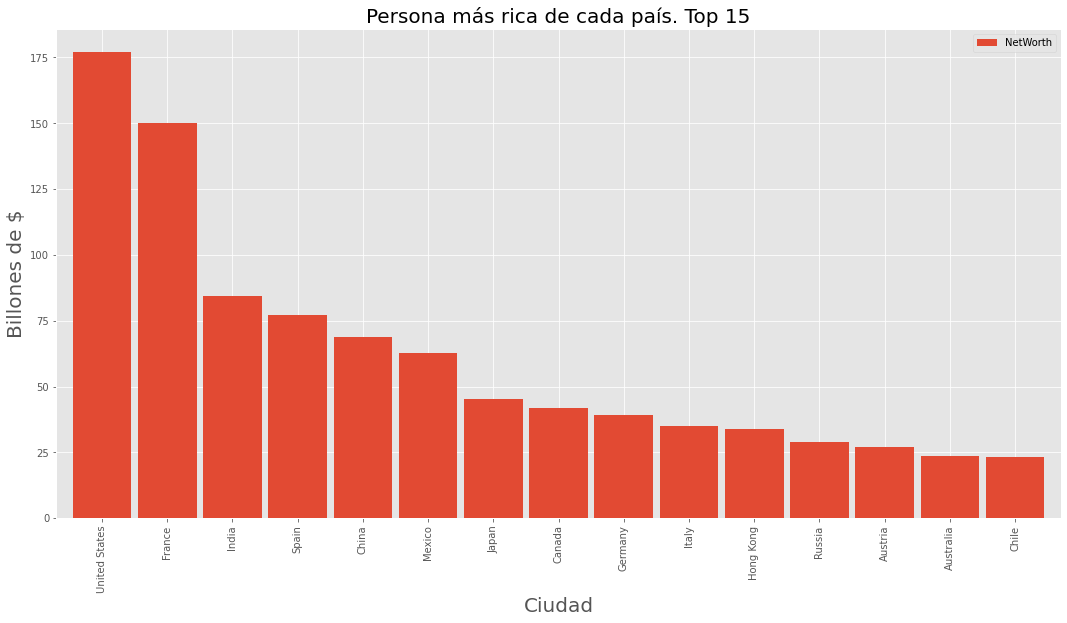

In [381]:
B_per_country.head(15).plot(kind ='bar',x ='Country', y = 'NetWorth', figsize = (18,9), width = .9)
plt.xlabel('Ciudad',fontsize=20)
plt.ylabel('Billones de $',fontsize=20)
plt.title('Persona más rica de cada país. Top 15', fontsize=20)

#### 7. Cantidad de dinero en billones de dólares por cada ciudad (considerando el top 2600 billonarios)

In [386]:
total_money = forbes_realtime.groupby('Country')[['NetWorth']].agg('sum').reset_index() #arupando el dinero por país
total_money

,Country,NetWorth
0,Algeria,4.8
1,Argentina,15.3
2,Australia,178.4
3,Austria,62.7
4,Belgium,11.5
...,...,...
65,United Kingdom,211.9
66,United States,4365.0
67,Venezuela,3.2
68,Vietnam,16.7


In [387]:
ordenados_money=total_money.head(100).sort_values(by = 'NetWorth', ascending = False)
ordenados_money

,Country,NetWorth
66,United States,4365.0
8,China,2483.1
18,Germany,623.4
24,India,587.1
50,Russia,575.8
...,...,...
23,Iceland,2.2
56,St. Kitts and Nevis,1.6
60,Tanzania,1.6
69,Zimbabwe,1.5


Text(0.5, 1.0, 'Cantidad de dinero en billones de dólares por cada ciudad [Top 15] (considerando el top de los 2600 billonarios)')

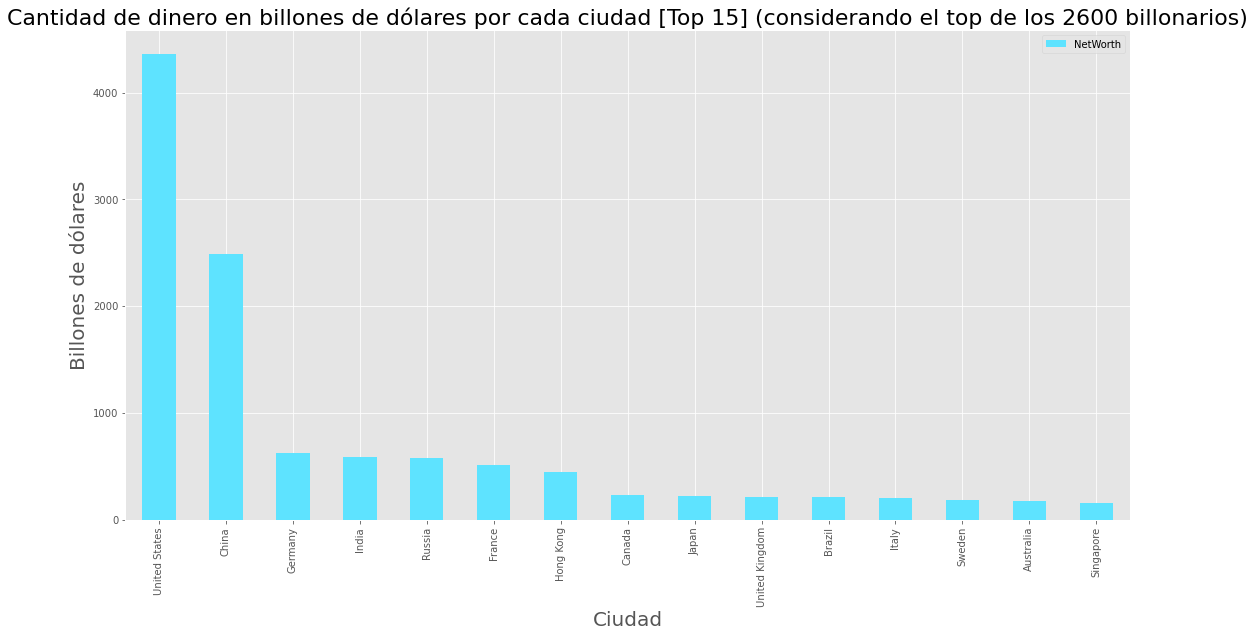

In [395]:
ordenados_money.head(15).plot.bar(x = 'Country', y = 'NetWorth',figsize = (18,9),xlim = 20, color ="#5ee3ff")
plt.xlabel('Ciudad', fontsize = 20)
plt.ylabel('Billones de dólares', fontsize = 20)
plt.title('Cantidad de dinero en billones de dólares por cada ciudad [Top 15] (considerando el top de los 2600 billonarios)', fontsize=22)

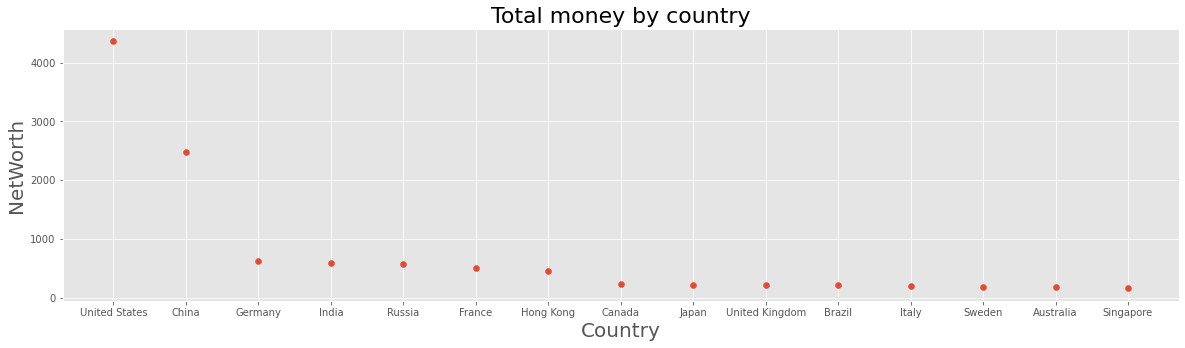

In [401]:
tm=ordenados_money.head(15) #seleccionando 15
fig, ax = plt.subplots(figsize=(20, 5))
ax.scatter(y = tm['NetWorth'], x = tm['Country'])
plt.ylabel("NetWorth", fontsize = 20)
plt.xlabel("Country", fontsize = 20)
plt.title('Total money by country', fontsize=22)
plt.show()

#### 8. Cantidad de billonarios por país

### Mapas

In [444]:
mapa=folium.Map(location=[-1, 0], zoom_start=2,tiles="Stamen Terrain") #crear mapamundi

In [430]:
ordenados_money

,Country,NetWorth
66,United States,4365.0
8,China,2483.1
18,Germany,623.4
24,India,587.1
50,Russia,575.8
...,...,...
23,Iceland,2.2
56,St. Kitts and Nevis,1.6
60,Tanzania,1.6
69,Zimbabwe,1.5


In [447]:
#Se necesita obtener las coordenadas de cada país. Se usa ordenado de mayor a menor ingreso.
paises=[] #crear listas vacías
billonarios=[]
for i in range(0,70): #son 70 países
    
    #Para obtener coordenadas:
    pais=geocoder.osm(ordenados_money['Country'][i]) # coordenadas
    ubicacion = [pais.lat, pais.lng] # trae variables con latitud y longitud 
    paises.append(ubicacion) # listado de ciudades
    
    #Para obtener catidad de billonarios por país en una lista:
    billonarios.append(Billonaries_by_country['Name'][i])
    
    
    

In [445]:
for i in range(0,5): #top 5
    folium.Marker(
        location=paises[i],
        popup=folium.Popup(max_width=450),
    ).add_to(mapa)

In [446]:
mapa

In [442]:
for i in range(0,70): #todos
    folium.Marker(
        location=paises[i],
        popup=folium.Popup(max_width=450),
    ).add_to(mapa)

In [443]:
mapa